In [1]:
import pandas as pd #principal herramienta de gestion de datasets como dataframe
import numpy as np #para trabajar con arrays y algunas cuestiones estadisticas
from sklearn import preprocessing #procesamiento de detasets 
from sklearn.metrics import mean_squared_error #herramienta estadistica para medir errores
import seaborn as sns #herramienta grafica
sns.set()
from sklearn.model_selection import train_test_split #para separar el dataset en entrenamiento y testeo
from sklearn.neighbors import KNeighborsClassifier #MODELO k-VECINOS
from sklearn.metrics import confusion_matrix #para crear la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay #para graficar la matriz de confusión
from sklearn.model_selection import GridSearchCV #para optimización de hiperparámetro
import joblib #airve para bajar el modelo entrenado y guardarlo como un achivo
import matplotlib.pyplot #herramienta grafica
import matplotlib.pyplot as plt #herramienta grafica
from sklearn.model_selection import cross_validate #para validacion cruzada 
from sklearn.metrics import accuracy_score #metrica accuracy
from sklearn.metrics import precision_score #metrica precisión
from sklearn.metrics import recall_score #metrica recall
from sklearn.metrics import f1_score #metrica f1 score
import warnings #evita que se llene de warnings el script
warnings.filterwarnings("ignore", category=FutureWarning) #evita que se llene de warnings el script
from sklearn.preprocessing import OrdinalEncoder # preprocesamiento de columna

In [2]:
#clono el repositorio

In [3]:
!git clone https://github.com/soyHenry/Datathon.git

Cloning into 'Datathon'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 83 (delta 15), reused 20 (delta 10), pack-reused 50
Unpacking objects: 100% (83/83), done.


In [4]:
#ingesto los datos en dataframe de pandas

In [5]:
df_train=pd.read_csv('Datathon/hospitalizaciones_train.csv')

In [6]:
 #realizo una copia para trabajar con back up de los datos crudos 

In [7]:
df1=df_train.copy()

In [8]:
#realizo una copia para trabajar con back up de los datos crudos 

In [9]:
df1.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [10]:
#creo una funcion para adaptar la columna label a categórica

In [11]:
def transf_label(df):
    lista_dias=df['Stay (in days)']
    lista_estancia=[]
    for i in lista_dias:
        if i <=8: 
            i=0
        elif i>8:
            i=1
        lista_estancia.append(i)
    array_estancia=np.array(lista_estancia)
    array_estancia.reshape(1,-1)
    array_estancia.shape
    df['estancia']=array_estancia
    df.drop(columns=['Stay (in days)'], inplace=True)
    return df

In [12]:
#aplico la función

In [13]:
transf_label(df1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


In [14]:
#Realizo una transormación de las columnas categoricas a numéricas 
#con label encoder en las no ordinales y ordinal encoder en las que si

In [15]:
le = preprocessing.LabelEncoder()
df1['Insurance'] = le.fit_transform(df1['Insurance'])
df1['health_conditions'] = le.fit_transform(df1['health_conditions'])
df1['Type of Admission'] = le.fit_transform(df1['Type of Admission'])
df1['gender'] = le.fit_transform(df1['gender'])
df1['doctor_name'] = le.fit_transform(df1['doctor_name'])
df1['Ward_Facility_Code'] = le.fit_transform(df1['Ward_Facility_Code'])
df1['Department'] = le.fit_transform(df1['Department'])

In [16]:
enc = OrdinalEncoder()
df1['Age'] = enc.fit_transform(df1[['Age']])
df1['Severity of Illness'] = enc.fit_transform(df1[['Severity of Illness']])

In [17]:
#se generan 2 data frame con distintas columnas para aplicar el modelo y analizar diferencias 

In [18]:
df2=df1.copy()
df3=df1.copy()

In [19]:
# ACONTINUACIÓN SE PUEDE VER TODOS LOS MODELOS GENERADOS Y SUS METRICAS CONSIDERANDO DISTINTAS FREATURES 
#_ ESTE PUNTO SE EXPLICA MEJOR EN EL TXT ESTRATEGIA FINAL

In [20]:
X2=df1[['Department','Age','doctor_name']]
#x=df[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','staff_available','patientid','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
y2=df1[['estancia']]

In [21]:
#COMO PUEDE VERSE ESTO SE RELIZA DOS VECES PORQUE SE ESTAN RELIZANDO 2 MODELO CON DISTINTA CANTIDAD DE FEATURES CADA UNO 
#PARA COMPARAR SU EFICACIA DURANTE EL PROCESO DE MODELADO

In [22]:
#realizo la primera partición de los datos, luego se hará una validación cruzada

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=20) 

# datos, dejo un 20% para testear

print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(287000, 3) (287000, 1) (123000, 3) (123000, 1)


In [23]:
#CON EL SIGUIENTE CODIGO SE DESARROLLO UN ENSAYO DEL HIOPERARÁMETRO OPTIMO CON VALIDACIÓN CRUZADA 

In [24]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X2, y2, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    #clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 5.26%
Completado: 10.53%
Completado: 15.79%
Completado: 21.05%
Completado: 26.32%
Completado: 31.58%
Completado: 36.84%
Completado: 42.11%
Completado: 47.37%
Completado: 52.63%
Completado: 57.89%
Completado: 63.16%
Completado: 68.42%
Completado: 73.68%
Completado: 78.95%
Completado: 84.21%
Completado: 89.47%
Completado: 94.74%
Completado: 100.0%


In [25]:
# SE GRAFICA EL AJUSTE 

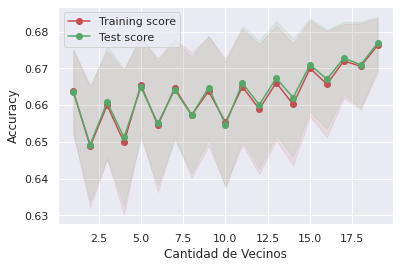

In [26]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

In [27]:
#SE INSTANCIA Y SE ENTRENA EL MODELO_1

In [ ]:
#SE INSTANCIA Y SE ENTRENA EL MODELO_1

In [29]:
knn2 = KNeighborsClassifier(n_neighbors=19)
knn2.fit(X2_train, y2_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

In [ ]:
#SE REPITEN LOS PROCESOS DE PREDICT CON CADA MODELO, RECORDEMOS QUE TIENEN DISTINTOS NÚMERO DE FEATURES CADA UNO

In [31]:
# se predice  sobre el set de entrenamiento
y2_train_pred = knn2.predict(X2_train)
# se predice sobre el set de test
y2_test_pred = knn2.predict(X2_test)

In [ ]:
#PROCESO DE VALIDACION CRUZADA PARA OPTIMIZAR LOS PARAMETROS 

In [ ]:
#ANALISIS DE PREDICCION LUEGO DE OPTIMIZACION

In [ ]:
#ANALISIS DE LAS METRICAS DE AMBOS MODELOS 

In [33]:
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y2_test,y2_test_pred))
print("Recall: ", metrics.recall_score(y2_test,y2_test_pred))
print("F1score:", metrics.f1_score(y2_test,y2_test_pred))

accuracy:  0.6821626016260163
Recall:  0.936791641697715
F1score: 0.7862711438162198


In [34]:
#EXACTITUD
exactitud = accuracy_score(y2_test, y2_test_pred)

#PRECISION
precision = precision_score(y2_test, y2_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y2_test, y2_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y2_test, y2_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')

El valor de la precisión para este modelo es de [0.7120133  0.67742482]
El valor de la recall es de [0.25944029 0.93679164]
El valor de accuracy es de 0.6821626016260163
El f1-score es de:[0.38030625 0.78627114], type[0.38030625 0.78627114]


In [ ]:
#GUARDO EL MODELO ENTRENADO

In [30]:
joblib.dump(knn2,'K_vecino_entrenado_knn_4')

['K_vecino_entrenado_knn_4']

In [ ]:
#abrimos el dataset de test, le aplicamos las transformaciones adecuadas y predecimos para generar un csv que se envía para chequeo

In [35]:
df_test_f=pd.read_csv('Datathon/hospitalizaciones_test.csv')

In [ ]:
#RECORDAMOS LOS FEATURES DE CADA MODELO
#X2=df1[['Department','Age','doctor_name']]

In [36]:

le = preprocessing.LabelEncoder()
df_test_f['Department'] = le.fit_transform(df_test_f['Department'])
df_test_f['doctor_name'] = le.fit_transform(df_test_f['doctor_name'])


In [37]:
enc = OrdinalEncoder()
df_test_f['Age'] = enc.fit_transform(df_test_f[['Age']])

In [ ]:
#RELIZO LA PREDICCION FINAL CON EL DATASET DE TEST

In [38]:
Xf=df_test_f[['Department','Age','doctor_name']]


In [40]:
y_test_pred_f=knn2.predict(Xf)

In [41]:
type(y_test_pred_f)

numpy.ndarray

In [42]:
df_f2=pd.DataFrame()

In [43]:
df_f2['pred']=y_test_pred_f

In [44]:
df_f2.sample(5)

,pred
49403,1
21666,0
18969,1
80376,1
80396,1


In [45]:
import os
from pathlib import Path as pl

In [ ]:
#EXPORTO EL ARCHIVO COMO CSV _ PARA LA ENTREGA 

In [46]:
filepath = pl('csv_prediccion/alitfasce.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_f2.to_csv(filepath,
                 sep= ",",
                 na_rep= "null",
                 header= True,
                 index= False,
                 index_label= None,
                 mode= "w",
                 encoding= "utf-8",
                 compression= "infer",            
                 decimal= "."
                 ) 
os.makedirs('csv_prediccion', exist_ok=True)  
df_f2.to_csv('csv_prediccion/alitfasce.csv', index=False)  